# Data Augmentation with ImageDataGenerator

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Image Sample loading

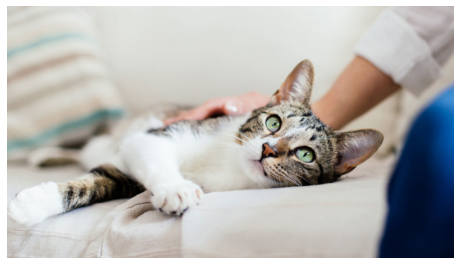

In [6]:
image = cv2.cvtColor(cv2.imread('./Cat_image.jpg'), cv2.COLOR_BGR2RGB)

def show_image(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis('off')

show_image(image)

In [7]:
image.shape

(579, 1028, 3)

## ImageDataGenerator를 이용하여 Augmentation 적용하기

- ImageDataGenerator는 fit(), flow()를 통해서 입력된 image array(numpy)를 변환 동작시킬 수 있으며, 실제 변환은 next() 등으로 iteration 호출해야 함
- ImageDataGenerator가 입력으로 받는 image array는 batch를 포함한 4차원 array임. 즉 [579, 1028, 3] shape인 image array가 입력되면 이를 4차원 형태인 [1, 579, 1028, 3]으로 변경해야 함
- 변경된 pixel값은 float이므로 이를 다시 int형으로 변경해서 시각화 필요

### 좌우, 상하 반전 (Horizontal Flip, Vertical Flip)
- horizontal_flip=True로 좌우 반전 적용. 하지만 반드시 변환하는 것은 아니며 Random하게 원본 데이터를 유지하거나 변환 결정
- vertical_flip=True로 상하 반전 적용. 마찬가지로 반드시 변환하는 것은 아니며 Random하게 원본 데이터를 유지하거나 변환 결정

image_batch shape :  (1, 579, 1028, 3)
aug_image shape :  (579, 1028, 3)


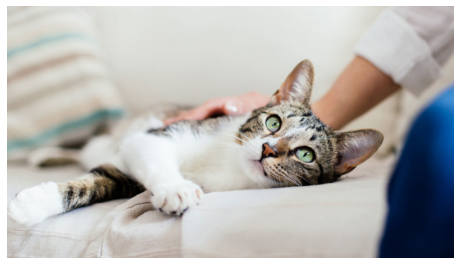

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Horizontal Flip (좌우 반전)을 적용. horizontal_flip=True을 적용했지만 반드시 변환하는 것은 아니다. Random하게 원본 데이터를 유지하거나 변환 결정
data_generator = ImageDataGenerator(horizontal_flip=True)

# ImageDataGenerator는 여러개의 image를 입력으로 받음. 따라서 3차원이 아니라 batch를 포함한 4차원 array를 입력받음. np.expand_dims()로 차원 증가
image_batch = np.expand_dims(image, axis=0)
print('image_batch shape : ', image_batch.shape)

# ImageDataGenerator 적용. fit() 후 flow()로 image batch를 넣어줘야 함
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)
print(data_gen_iter)
# ImageDataGenerator를 동작하기 위해서는 next() 등으로 iteration을 호출해야함.
aug_image_batch = next(data_gen_iter)
# print(aug_image_batch, aug_image_batch.shape)

# 반환된 데이터는 batch까지 포함된 4차원 array이므로 다시 3차원 image array로 변환
aug_image = np.squeeze(aug_image_batch)
print('aug_image shape : ', aug_image.shape)

# 반환된 pixel 값은 float임. 이를 다시 int형으로 변경 후 이미지 시각화
aug_image = aug_image.astype('int')
show_image(aug_image)

## 랜덤이라서 플립이 될 수도 있고 안될 수 도 있다!!

**파라미터 값들**\
ImageDataGenerator(\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;featurewise_center=False,\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;samplewise_center=False,\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;featurewise_std_normalization=False,\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;samplewise_std_normalization=False,\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;zca_whitening=False,\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;zca_epsilon=1e-06,\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;rotation_range=0, <font color='red'># Rotation(회전)</font>\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;width_shift_range=0.0, <font color='red'># Shift(translate)</font>\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;height_shift_range=0.0, <font color='red'># Shift(translate)</font>\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;brightness_range=None, <font color='red'># Bright(밝기)</font>\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; shear_range=0.0, <font color='red'># Shear</font>\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;zoom_range=0.0, <font color='red'> Zoom(scale)</font>\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;channel_shift_range=0.0, <font color='red'>Channel Shift</font>\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;fill_mode='nearest', <font color='red'>빈 공간을 채우는 방법</font>\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cval=0.0,\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;horizontal_flip=False, <font color='red'>Flip</font>\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;vertical_flip=False, <font color='red'>Flip</font>\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;rescale=None,\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;preprocessing_function=None,\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;data_format=None,\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;validation_split=0.0,\
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;dtype=None,\
)

### 여러 이미지의 ImageDataGenerator 변환을 수행하는 함수 생성
- ImageDataGenerator는 next()로 호출이 될 떄마다 Random하게 Augmentation 적용이 설정되어 변환됨

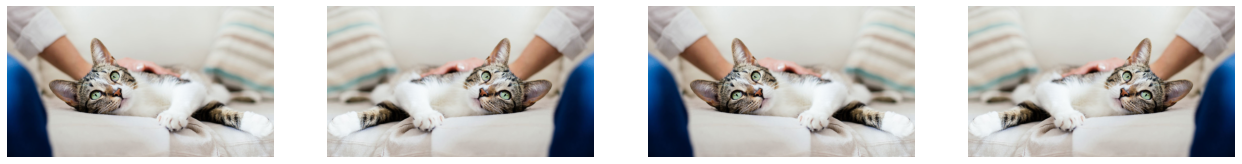

In [31]:
N_IMAGES = 4
fig, axs = plt.subplots(nrows=1, ncols=N_IMAGES, figsize=(22,8))

for i in range(N_IMAGES):
    aug_image_batch = next(data_gen_iter)
    aug_image = np.squeeze(aug_image_batch)
    aug_image = aug_image.astype('int')
    axs[i].imshow(aug_image)
    axs[i].axis('off')

In [32]:
# ImageDataGenerator 객체를 입력하면 augmentation 적용된 일련의 image들을 시각화 해주는 함수 생성
def show_aug_image_batch(image, data_generator, n_images=4, to_int=True):
    image_batch = np.expand_dims(image, axis=0)
    
    #ImageDataGenerator 적용. fit() 후 flow()로 image batch를 넣어줘야 함
    data_generator.fit(image_batch)
    data_gen_iter = data_generator.flow(image_batch)
    
    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(6*n_images, 4))
    
    for i in range(n_images):
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        if to_int:
            aug_image = aug_image.astype('int')
        axs[i].imshow(aug_image)
        axs[i].axis('off')

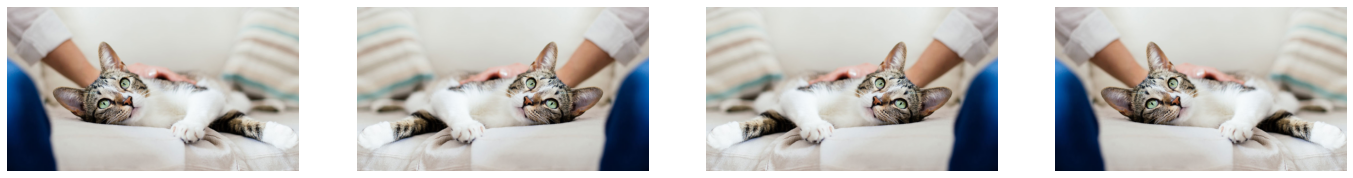

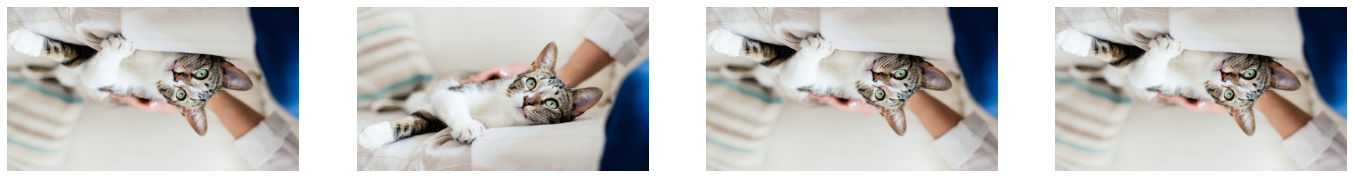

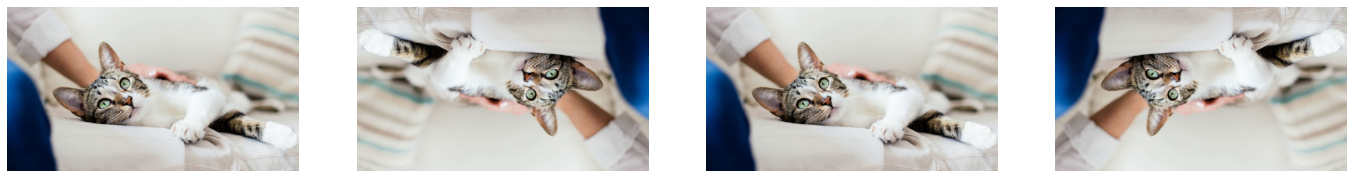

In [34]:
# Horizontal Flip (좌우 반전)을 적용. horizontal_flip=True을 적용했지만 반드시 변환하는 것은 아니다. Random하게 원본 데이터를 유지하거나 변환 결정
data_generator = ImageDataGenerator(horizontal_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

# Vertical Flip (좌우 반전)을 적용. vertical_flip=True을 적용했지만 반드시 변환하는 것은 아니다. Random하게 원본 데이터를 유지하거나 변환 결정
data_generator = ImageDataGenerator(vertical_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

# 두개를 함꼐 적용
data_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

### 이미지 Rotation(회전) 적용

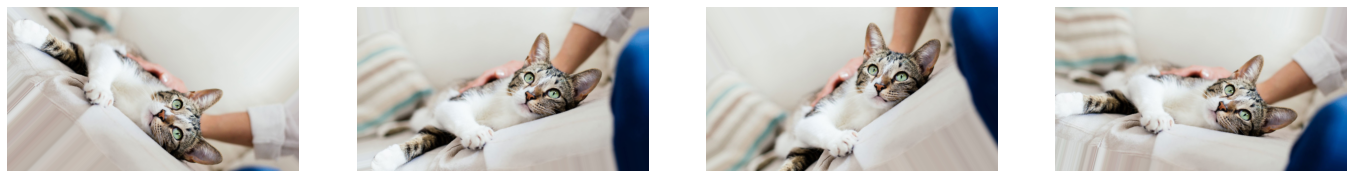

In [40]:
# rotation 범위를 -45 ~ 45도로 설정
data_gen = ImageDataGenerator(rotation_range=45)
show_aug_image_batch(image, data_gen, n_images=4)

### 이미지 좌우, 상하 이동(Shift)
- width_shift_range, height_shift_range 입력 인자를 통해 좌우, 상하 이동
- width_shift_range, height_shift_range 값은 0 ~ 1 사이 값 부여. 수행 시 마다 전체 이미지 대비 해당 범위의 값 비율만큼 Random 하게 이동
- 이동하게 되면 이동되고 남아있는 공간은 비어있게 되는데 이를 어떻게 채울지는 fill_mode 인자로 결정
- fill_mode는 아래와 같이 설정
    - nearest : 가장 빈공간에 가장 근접한 pixel로 채우기
    - reflect : 빈공간 만큼의 영역을 근처 공간으로 채우되 마치 거울로 반사되는 이미지를 보듯이 채움
    - wrap : 빈공간을 이동으로 잘려나간 이미지로 채움
    - constant : 특정 픽셀값으로 채움. 이때 특정 픽셀값은 cval 값으로 채움. cval=0 이면 검은색 픽셀로 채움

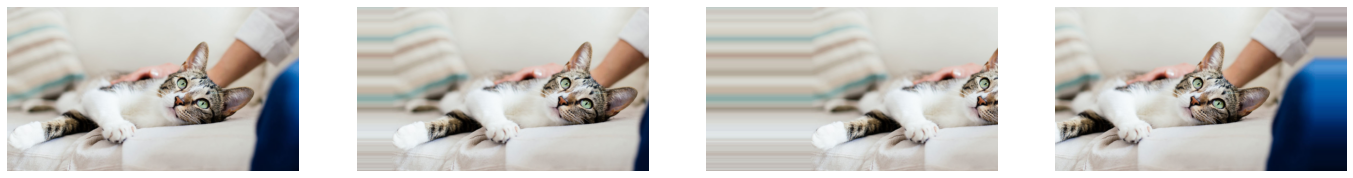

In [41]:
# 왼쪽 또는 오른쪽으로 이미지 이동을 주어진 width_shift_range에 따라 random하게 수행
# 시프트가 될때 빈 영역을 근처 영역을 복사해서 붙여넣게 된다. (fill_mode = 'nearest')
data_generator = ImageDataGenerator(width_shift_range=0.4)
show_aug_image_batch(image, data_generator, n_images=4)

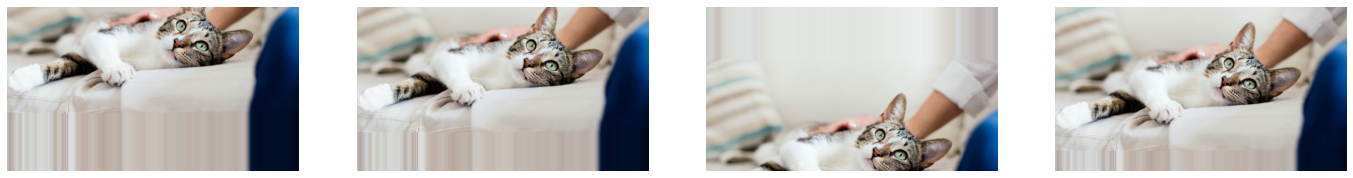

In [42]:
# 왼쪽 또는 아래쪽 이미지 이동을 주어진 height_shift_range에 따라 random하게 수행
data_generator = ImageDataGenerator(height_shift_range=0.4)
show_aug_image_batch(image, data_generator, n_images=4)

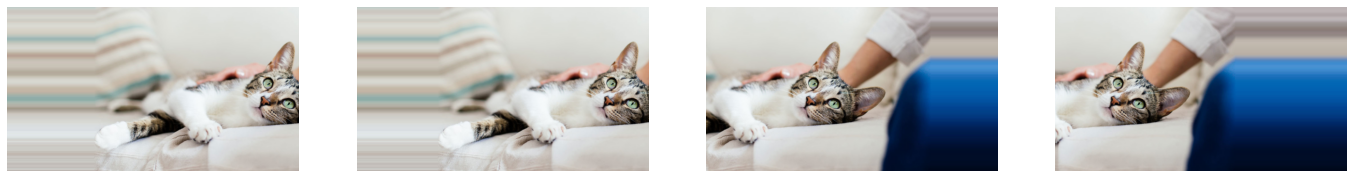

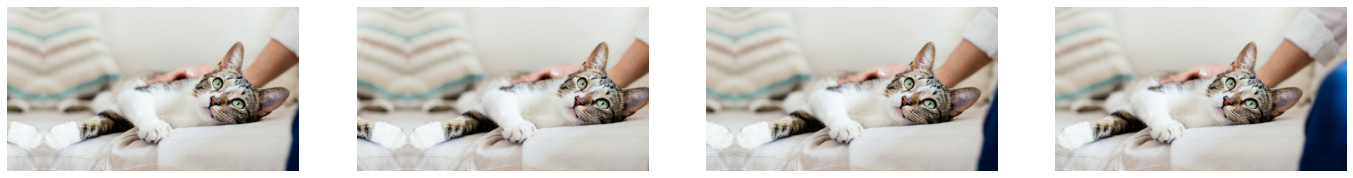

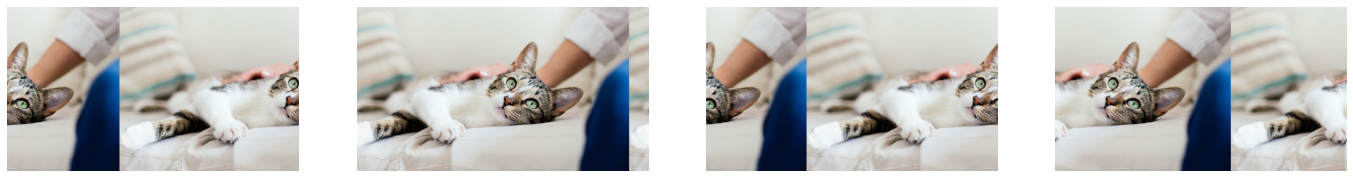

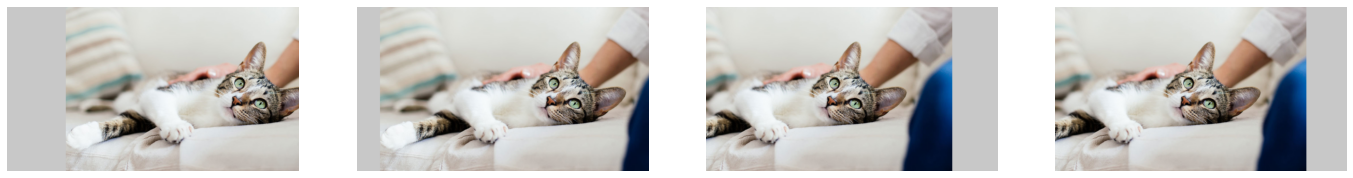

In [50]:
# 빈공간을 가장 가까운 곳의 픽셀값으로 채움
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='nearest')
show_aug_image_batch(image, data_generator, n_images=4)

# 빈공간 만큼의 영역을 근처 공간의 반사된 이미지로 채움
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='reflect')
show_aug_image_batch(image, data_generator, n_images=4)

# 빈공간을 이동으로 잘려나간 이미지로 채움
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='wrap')
show_aug_image_batch(image, data_generator, n_images=4)

# 특정 픽셀값으로 채움. 이때 특정 픽셀값은 cval 값으로 채움 # RGB값은 안되나봄??
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='constant', cval=200)
show_aug_image_batch(image, data_generator, n_images=4)

### Zoom(scale) 적용
- Zoom은 zoom_range을 설정하여 적용. zoom_range가 1보다 작으면 확대(Zoom in), 1보다 크면 축소(Zoom out)
- 축소 시 빈 공간은 fill_mode에 따라 픽셀을 채움. Default는 nearest